# Capstone Project

Team members:

1. Jayant Dabas
2. Rebecca Rinehart
3. Eric Zhao

Eric's N-number: N19057054

In [264]:
# Import packages

import urllib.request

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

In [265]:
# Seed random generator using Eric's N-number
seed = 19057054
np.random.seed(19057054)

In [266]:
def load_data(filename):
  col_names = {
    'rmpCapstoneNum.csv': ['avg_rating', 'avg_difficulty', 'num_ratings', 'is_pepper', 'num_repeat', 'num_online', 'is_male', 'is_female'],
    'rmpCapstoneQual.csv': ['major', 'university', 'state'],
    'rmpCapstoneTags.csv': ["Tough grader", "Good feedback", "Respected", "Lots to read",
             "Participation matters", "Don't skip", "Lots of homework",
             "Inspirational", "Pop quizzes", "Accessible", "So many papers",
             "Clear grading", "Hilarious", "Test heavy", "Graded by few things",
             "Amazing lectures", "Caring", "Extra credit", "Group projects",
             "Lecture heavy"]
  }
  return pd.read_csv(filename, names=col_names[filename])

df_num  = load_data('rmpCapstoneNum.csv')
df_qual = load_data('rmpCapstoneQual.csv')
df_tags = load_data('rmpCapstoneTags.csv')

In [267]:
display(df_num.head())
display(df_qual.head())
display(df_tags.head())

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


,major,university,state
0,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN
2,English,Alabama State University,AL
3,English,University of Kentucky,KY
4,English,Keiser University,FL


,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [268]:
# confirm same sample size
print(len(df_num))
print(len(df_qual))
print(len(df_tags))

89893
89893
89893


**Merge dataframes into one**

In [269]:
raw_df = pd.concat([df_num, df_qual, df_tags], axis = 1)
raw_df

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female,major,university,state,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1,Criminal Justice,George Mason University,VA,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,AL,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,KY,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0,English,Keiser University,FL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89888,2.5,2.5,2.0,0.0,NaN,0.0,0,0,Computer Science,Texas Tech University,TX,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
89889,4.5,2.0,2.0,0.0,NaN,0.0,1,0,Theater,University of Winnipeg,MB,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
89890,5.0,1.7,6.0,1.0,100.0,2.0,1,0,Criminal Justice,Salt Lake Community College,UT,0,3,1,1,2,1,0,0,0,1,0,0,4,0,0,1,0,0,0,0
89891,3.6,1.8,5.0,0.0,NaN,0.0,0,0,French,University of Ottawa,ON,0,0,1,1,0,0,0,0,0,0,0,4,0,0,0,0,2,0,0,3


**Removing professors with less than 3 ratings**

In [270]:
df = raw_df.dropna(subset = ['num_ratings'])
med_num_ratings = np.median(df['num_ratings'])
avg_num_ratings = np.mean(df['num_ratings'])
print('Median number of ratings per professor: ', med_num_ratings)
print('Average number of ratings per professor: ', avg_num_ratings)

for k in [3, 5]:
  k_df = df[df['num_ratings'] >= k]
  size = len(k_df)
  pct_total = size / len(raw_df) * 100
  print(f'Sample size with {k} or more ratings per professor: {size}')
  print(f'Percentage of original sample size: {pct_total:.4f}%')

# filtering for at least 3 ratings
df = df[df['num_ratings'] >= 3]

Median number of ratings per professor:  3.0
Average number of ratings per professor:  5.374721444488887
Sample size with 3 or more ratings per professor: 40528
Percentage of original sample size: 45.0847%
Sample size with 5 or more ratings per professor: 25368
Percentage of original sample size: 28.2202%


We have chosen to filter for (keep) professors with **3 or more ratings**, as it retains as much of the data possible while reducing the amount of professors with extreme ratings (1 or 5 due to receiving only 1 or 2 ratings).

**Drop nulls for gender and average difficulty**

In [271]:
# Assumption: The data represents sex assigned at birth. Therefore is_male, is_female can not be equal.
df = df[df['is_male'] != df['is_female']]

# Drop rows with missing gender info
df = df.dropna(subset=['is_male', 'is_female'])

# Remove rows with missing average difficulty
df = df.dropna(subset=['avg_difficulty'])

In [272]:
df

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female,major,university,state,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,AL,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,English,Eastern Florida State College,FL,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3
18,4.2,1.7,3.0,1.0,NaN,0.0,0,1,English,Lone Star College (all),TX,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0,Management,University of Alabama,AL,4,3,0,0,2,0,1,1,0,0,0,0,0,0,0,1,1,0,5,1
22,3.7,2.7,3.0,0.0,NaN,1.0,1,0,Business,University of Alabama at Birmingham,AL,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89866,4.4,3.6,14.0,1.0,88.0,0.0,0,1,Chemistry,Brigham Young University-Idaho,ID,4,1,1,0,1,5,3,0,0,2,0,3,3,3,1,4,2,3,0,1
89868,3.8,2.8,6.0,0.0,NaN,0.0,0,1,Geology,University of South Alabama,AL,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,3,1,4
89877,3.6,3.4,10.0,0.0,50.0,1.0,1,0,Mathematics,University of Oklahoma,OK,3,0,1,0,0,1,6,1,1,3,0,1,2,2,0,1,3,0,0,1
89885,3.9,3.8,4.0,1.0,NaN,0.0,0,1,Psychology,University of Ottawa,ON,2,0,0,3,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0


## Q5. Is there a gender difference in terms of average difficulty? Again, a significance test is indicated.

**Data Cleaning**

In [273]:
df_5 = df.copy()

# Split the data into male and female ratings
male_difficulty = df_5[df_5['is_male'] == 1]['avg_difficulty']
female_difficulty = df_5[df_5['is_female'] == 1]['avg_difficulty']

# print cleaned statitics
print('Male difficulty: ')
print('Sample size: ', len(male_difficulty))
print(f'Mean: {np.mean(male_difficulty):.4f}')
print(f'Standard deviation: {np.std(male_difficulty):.4f}')
print(f'\n')

print('Male difficulty:')
print('Sample size: ', len(female_difficulty))
print(f'Mean: {np.mean(female_difficulty):.4f}')
print(f'Standard deviation: {np.std(female_difficulty):.4f}')

Male difficulty: 
Sample size:  15801
Mean: 2.8841
Standard deviation: 0.8530


Male difficulty:
Sample size:  13925
Mean: 2.8827
Standard deviation: 0.8509


**Visualization**

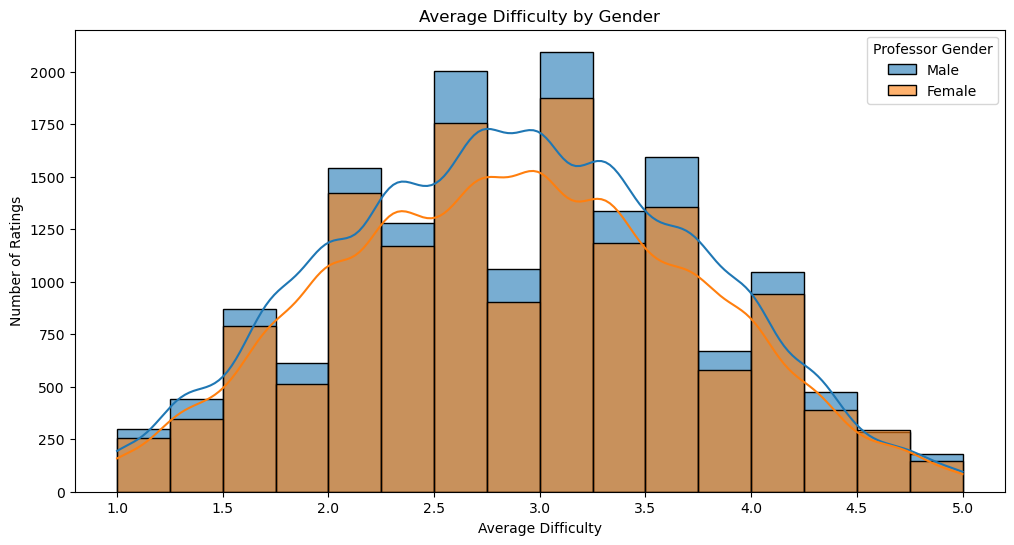

In [274]:
plt.figure(figsize=(12, 6))

sns.histplot(male_difficulty, kde=True, bins=16, alpha=0.6, label='Male')
sns.histplot(female_difficulty, kde=True, bins=16, alpha=0.6, label='Female')

plt.title('Average Difficulty by Gender')
plt.xlabel('Average Difficulty')
plt.ylabel('Number of Ratings')
plt.legend(title='Professor Gender')

plt.show()

**Comparing variances**

Because the data appears to be normally distributed, I could employ an F-test to determine if the variances are different. Here, I will use Levene's test; it is more robust than F-test, as it does not require assumption of normality. F-test is more sensitive to normality violations.

In [275]:
levene_stat, levene_pval = stats.levene(male_difficulty, female_difficulty)

print('Levene\'s test: ')
print(f'Statistic: {levene_stat:.4f}')
print(f'p-value: {levene_pval:.4f}')

Levene's test: 
Statistic: 0.0927
p-value: 0.7607


In [276]:
f_stat, f_pval = stats.f_oneway(male_difficulty, female_difficulty)

print('Levene\'s test: ')
print(f'Statistic: {f_stat:.4f}')
print(f'p-value: {f_pval:.4f}')

Levene's test: 
Statistic: 0.0202
p-value: 0.8871


H0: The average difficulties for male and female professors have equal variances.
H1: The average difficulties for male and female professors have unequal variances.
Because p-value > 0.005, we retain the null hypothesis and conclude that the variances are equal.

**Statistical test**

Because the difficulty score was presented as an average in the original dataset, we are assuming that difficulty can be reduced to its sample mean.

We are comparing 2 sample means, do not know the population parameters, no large inter-individual variability, and similar variances. Therefore, we will use an independent samples t-test.

In [277]:
statistic, pval = stats.ttest_ind(male_difficulty, female_difficulty)
print('t test statistic: ', statistic)
print('p-value: ', pval)
print('p-value < alpha = 0.005?', pval< 0.005)
print('Findings: The average difficulty scores of male and female professors are not significantly different. The results are consistent with chance.')
print('Conclusion: There is no gender difference in average difficulty.')

t test statistic:  0.14195532904551686
p-value:  0.8871162526038965
p-value < alpha = 0.005? False
Findings: The average difficulty scores of male and female professors are not significantly different. The results are consistent with chance.
Conclusion: There is no gender difference in average difficulty.


## Q6. Please quantify the likely size of this effect at 95% confidence.

**Calculate effect size (Cohen's d) with 95% confidence intervals**

In [278]:
mean_male = np.mean(male_difficulty)
std_male = np.std(male_difficulty)

mean_female = np.mean(female_difficulty)
std_female = np.std(female_difficulty)

numerator = abs(mean_male - mean_female)
denominator = np.sqrt((std_male**2 + std_female**2) / 2) # pooled sd
d = numerator/denominator

print(f'Effect size (Cohen\'s d): {d:.6f}')

Effect size (Cohen's d): 0.001650


In [279]:
confidence = 0.95 #confidence level at 95%
size_male = len(male_difficulty)
size_female = len(female_difficulty)

# calculate standard error of d
se = np.sqrt((size_male + size_female)/(size_male * size_female) + d**2/(2*(size_male + size_female)))

# calculate z score and confidence intervals
z_score = stats.norm.ppf((1 + confidence) / 2)
lower_cb = d - z_score * se
upper_cb = d + z_score * se

print(f'95% confidence interval: [{lower_cb:.5f}, {upper_cb:.5f}]')

95% confidence interval: [-0.02113, 0.02443]


Findings: We estimate the effect size to be 0.001650 with 95% confidence that the true effect lies in the interval of [-0.02113, 0.02443].

Interpretation: With an effect size this small, the distribution of average difficulty between male and female professors nearly overlaps. The average difference in average difficulty is 0.165% of a standard deviation.

**Visualization**

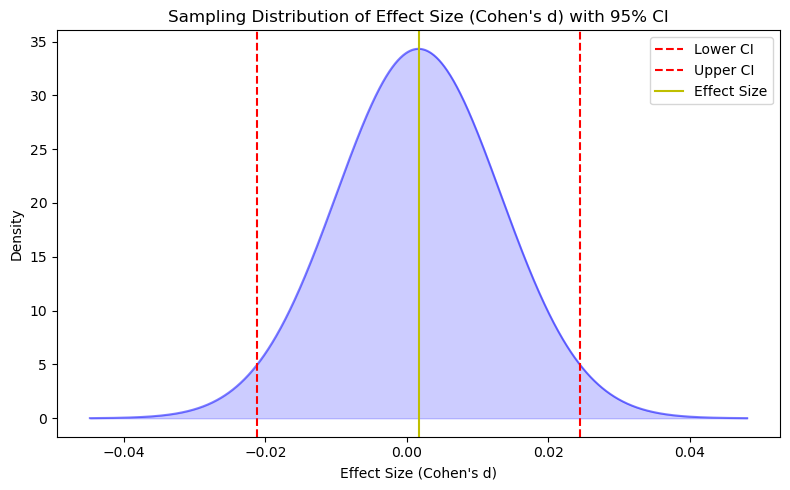

In [280]:
# Create the plot
plt.figure(figsize=(8, 5))

x = np.linspace(d - 4*se, d + 4*se, 1000)
y = stats.norm.pdf(x, d, se)

plt.plot(x, y, color = 'b', alpha = 0.5)
plt.fill_between(x, y, alpha = 0.2, color = 'b')

plt.axvline(lower_cb, color = 'r', linestyle = 'dashed', linewidth = 1.5, label = 'Lower CI')
plt.axvline(upper_cb, color = 'r', linestyle = 'dashed', linewidth = 1.5, label = 'Upper CI')
plt.axvline(d, color = 'y', linestyle = 'solid', linewidth = 1.5, label = 'Effect Size')

plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Density')
plt.title('Sampling Distribution of Effect Size (Cohen\'s d) with 95% CI')

plt.legend()
plt.tight_layout()
plt.show()

## Q8. Build a regression model predicting average ratings from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average rating? Hint: Make sure to address collinearity concerns. Also comment on how this model compares to the previous one.

**Dataframe joining and cleaning**

In [281]:
df

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female,major,university,state,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,AL,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,English,Eastern Florida State College,FL,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3
18,4.2,1.7,3.0,1.0,NaN,0.0,0,1,English,Lone Star College (all),TX,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0,Management,University of Alabama,AL,4,3,0,0,2,0,1,1,0,0,0,0,0,0,0,1,1,0,5,1
22,3.7,2.7,3.0,0.0,NaN,1.0,1,0,Business,University of Alabama at Birmingham,AL,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89866,4.4,3.6,14.0,1.0,88.0,0.0,0,1,Chemistry,Brigham Young University-Idaho,ID,4,1,1,0,1,5,3,0,0,2,0,3,3,3,1,4,2,3,0,1
89868,3.8,2.8,6.0,0.0,NaN,0.0,0,1,Geology,University of South Alabama,AL,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,3,1,4
89877,3.6,3.4,10.0,0.0,50.0,1.0,1,0,Mathematics,University of Oklahoma,OK,3,0,1,0,0,1,6,1,1,3,0,1,2,2,0,1,3,0,0,1
89885,3.9,3.8,4.0,1.0,NaN,0.0,0,1,Psychology,University of Ottawa,ON,2,0,0,3,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0


In [282]:
print(df['avg_rating'].size)
print(df['avg_difficulty'].size)
print(df['Amazing lectures'].size)

29726
29726
29726


In [283]:
df.head()

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female,major,university,state,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,AL,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,English,Eastern Florida State College,FL,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3
18,4.2,1.7,3.0,1.0,NaN,0.0,0,1,English,Lone Star College (all),TX,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0,Management,University of Alabama,AL,4,3,0,0,2,0,1,1,0,0,0,0,0,0,0,1,1,0,5,1
22,3.7,2.7,3.0,0.0,NaN,1.0,1,0,Business,University of Alabama at Birmingham,AL,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [284]:
tag_cols = [col for col in df_tags.columns]

df_8 = pd.concat([
    df[['num_ratings', 'avg_rating']], 
    df[tag_cols]], axis = 1)

df_8.shape
df_8

,num_ratings,avg_rating,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
2,4.0,3.2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
5,22.0,3.5,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3
18,3.0,4.2,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21,10.0,2.6,4,3,0,0,2,0,1,1,0,0,0,0,0,0,0,1,1,0,5,1
22,3.0,3.7,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89866,14.0,4.4,4,1,1,0,1,5,3,0,0,2,0,3,3,3,1,4,2,3,0,1
89868,6.0,3.8,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,3,1,4
89877,10.0,3.6,3,0,1,0,0,1,6,1,1,3,0,1,2,2,0,1,3,0,0,1
89885,4.0,3.9,2,0,0,3,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0


**Normalize tag numbers**

To account for professors with numbers of ratings, we will normalize by calculating the proportion of that professor's ratings per tag, rather than using the raw number of ratings.

In [285]:
df_8

,num_ratings,avg_rating,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
2,4.0,3.2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
5,22.0,3.5,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3
18,3.0,4.2,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21,10.0,2.6,4,3,0,0,2,0,1,1,0,0,0,0,0,0,0,1,1,0,5,1
22,3.0,3.7,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89866,14.0,4.4,4,1,1,0,1,5,3,0,0,2,0,3,3,3,1,4,2,3,0,1
89868,6.0,3.8,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,3,1,4
89877,10.0,3.6,3,0,1,0,0,1,6,1,1,3,0,1,2,2,0,1,3,0,0,1
89885,4.0,3.9,2,0,0,3,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0


**Is num_ratings the same as the sum of ratings over each row?**

In [286]:
total_ratings = df_8[tag_cols].sum(axis = 1)

df_8['num_ratings'] == total_ratings 

2        False
5        False
18       False
21       False
22        True
         ...  
89866    False
89868    False
89877    False
89885    False
89890    False
Length: 29726, dtype: bool

No, so num_ratings cannot be used to normalize the tags. We must use the sum over each row.

In [287]:
# avoid division by zero - replace 0 sums with 1
total_ratings = total_ratings.replace(0, 1)

for col in tag_cols:
    df_8[col] = df[col] / total_ratings

# verify that normalized values add up to either 1 or 0 per row
df_8['sum over row'] = df_8[tag_cols].sum(axis = 1)
print(df_8[~df_8['sum over row'].round(10).isin([0.0, 1.0])]['sum over row']) # print any rows where sum is not 0 or 1

df_8 = df_8.drop(columns = 'sum over row') # remove column after verifying
df_8.head()

Series([], Name: sum over row, dtype: float64)


,num_ratings,avg_rating,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
2,4.0,3.2,0.166667,0.083333,0.166667,0.083333,0.000000,0.333333,0.166667,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5,22.0,3.5,0.150943,0.245283,0.018868,0.056604,0.037736,0.056604,0.037736,0.018868,0.0,0.056604,0.0,0.132075,0.056604,0.0,0.0,0.000000,0.056604,0.0,0.018868,0.056604
18,3.0,4.2,0.000000,0.400000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.200000,0.0,0.000000,0.000000
21,10.0,2.6,0.210526,0.157895,0.000000,0.000000,0.105263,0.000000,0.052632,0.052632,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.052632,0.052632,0.0,0.263158,0.052632
22,3.0,3.7,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


**Ridge Regression with Cross Validation**

In [288]:
# split data into predictors and target
X = df_8.drop(columns = ['avg_rating', 'num_ratings'])
y = df_8['avg_rating']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# define hyperparameter tuning grid
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1, 2, 5, 10, 15, 20, 25, 30, 50, 100]}
ridge_cv = GridSearchCV(Ridge(random_state = seed), param_grid, cv = 5)
ridge_cv.fit(X_train_scaled, y_train)

# get best params and fit ridge
print(f'Best param: {ridge_cv.best_params_}')
print(f'Best score: {ridge_cv.best_score_}')

betas = ridge_cv.best_estimator_.coef_

best_ridge = ridge_cv.best_estimator_
best_ridge.fit(X_train_scaled, y_train)

# make predictions
y_pred = best_ridge.predict(X_test_scaled)

# calculate performance metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Model Performance Metrics:')
print(f'R2 score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

cv_scores = cross_val_score(best_ridge, X_train_scaled, y_train, cv = 5)
print(f'Cross Validation Scores')
print(f'Mean R2: {cv_scores.mean():.4f}')

Best param: {'alpha': 10}
Best score: 0.6465409621349849
Model Performance Metrics:
R2 score: 0.6513
RMSE: 0.5826
Cross Validation Scores
Mean R2: 0.6465


**Visualization of the Coefficients**

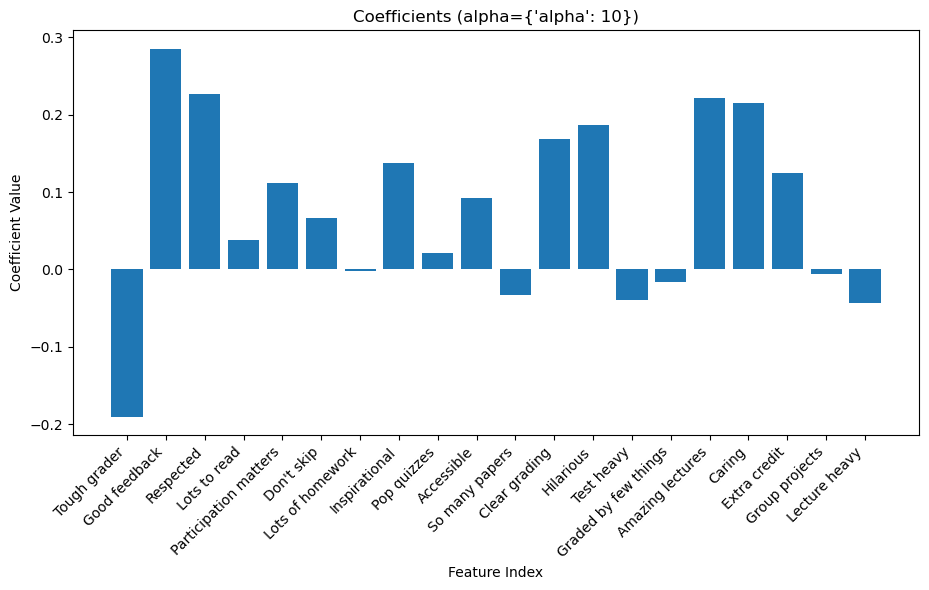

In [290]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 2)
plt.bar(range(len(betas)), betas)
plt.title(f'Coefficients (alpha={ridge_cv.best_params_})')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(betas)), labels = tag_cols, rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

**EXTRA (may not use) Check for high sparsity tags**

In [95]:
tags_df = df_8.iloc[:,1:]

print('Proportion of professors without each tag')
for col in tags_df.columns:
  no_tag = tags_df[tags_df[col] == 0]
  print(f'{col}: {(len(no_tag) / len(tags_df)*100):.2f}%')


Proportion of professors without each tag
tag1: 49.34%
tag2: 30.65%
tag3: 45.42%
tag4: 54.52%
tag5: 43.83%
tag6: 48.63%
tag7: 55.15%
tag8: 61.14%
tag9: 86.66%
tag10: 69.42%
tag11: 85.23%
tag12: 48.85%
tag13: 61.29%
tag14: 85.46%
tag15: 83.63%
tag16: 60.31%
tag17: 37.36%
tag18: 67.83%
tag19: 80.48%
tag20: 64.19%


## Q10. Build a classification model that predicts whether a professor receives a “pepper” from all available factors(both tags and numerical). Make sure to include model quality metrics such as AU(RO)C and also address class imbalance concerns.